Tak Kit Yeung<br>
EDA<br>
The exploratory data analysis is performed for <a href='https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5/about_data'>DSNY Monthly Tonnage dataset</a> (Updated October 8, 2024), found in <a href='https://github.com/awesomedata/awesome-public-datasets'>awesome public datasets</a>.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create dataframe from .csv file, assume .ipynb and .csv files are in the same directory
df = pd.read_csv('DSNY_Monthly_Tonnage_Data.csv', sep=',')

In [3]:
# show information of dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23945 entries, 0 to 23944
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                23945 non-null  object 
 1   BOROUGH              23945 non-null  object 
 2   COMMUNITYDISTRICT    23945 non-null  object 
 3   REFUSETONSCOLLECTED  23939 non-null  float64
 4   PAPERTONSCOLLECTED   21317 non-null  float64
 5   MGPTONSCOLLECTED     21029 non-null  float64
 6   RESORGANICSTONS      2379 non-null   float64
 7   SCHOOLORGANICTONS    1898 non-null   float64
 8   LEAVESORGANICTONS    887 non-null    float64
 9   XMASTREETONS         1685 non-null   float64
 10  BOROUGH_ID           23939 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.0+ MB
None


The table shows most values (above 90%) for residential organics, school organics, leaves, and Christmas trees collected in tons are missing from the dataset.

In [4]:
# convert MONTH column type to datetime and create YEARS and MONTHS columns
df['YEARS'] = pd.to_datetime(df['MONTH'], format='%Y / %m')
df['MONTHS'] = df['YEARS'].dt.month
df['MONTHS'] = df['MONTHS'].astype('str')
# convert BOROUGH_ID column type to str
df['BOROUGH_ID'] = df['BOROUGH_ID'].astype('str')

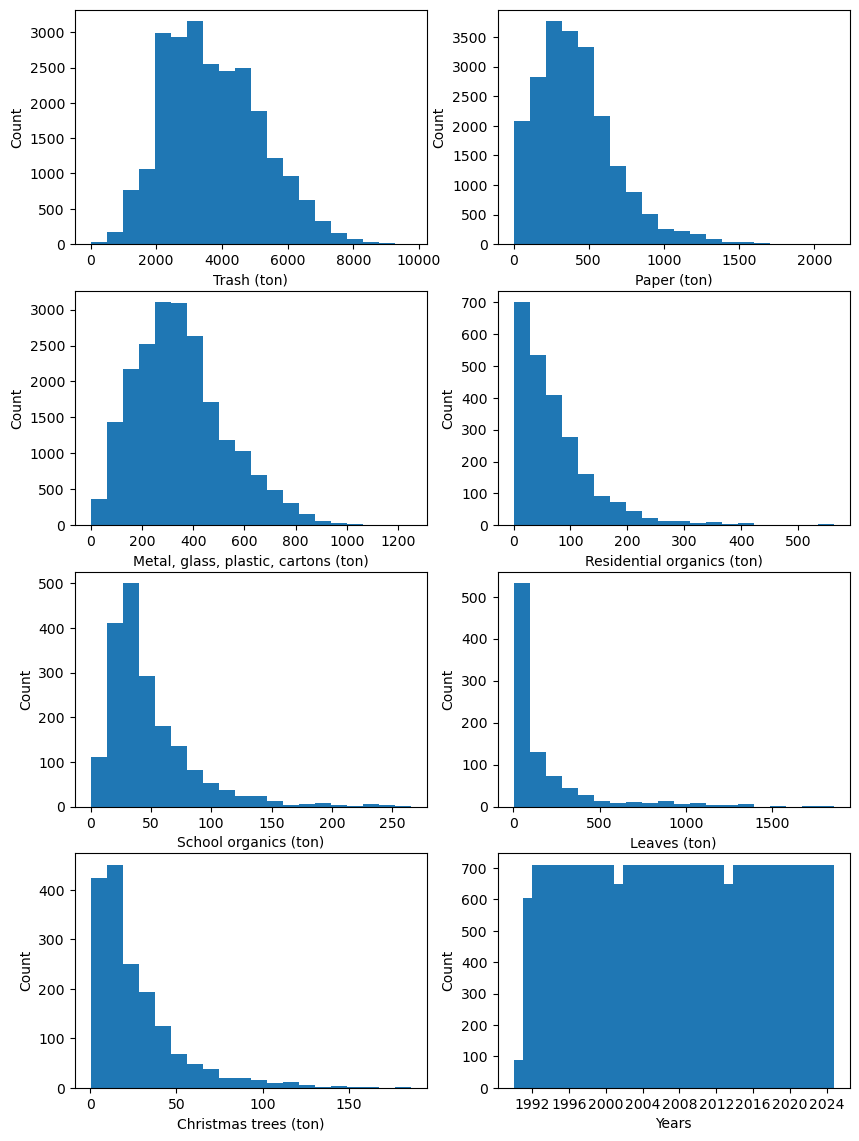

In [5]:
# plot 1D histograms for numerical data
nrow, ncol = 4, 2
nbin = 20
fig, ax = plt.subplots(nrow, ncol, figsize=(10, 14))
ax[0, 0].hist(df['REFUSETONSCOLLECTED'], bins=nbin)
ax[0, 1].hist(df['PAPERTONSCOLLECTED'], bins=nbin)
ax[1, 0].hist(df['MGPTONSCOLLECTED'], bins=nbin)
ax[1, 1].hist(df['RESORGANICSTONS'], bins=nbin)
ax[2, 0].hist(df['SCHOOLORGANICTONS'], bins=nbin)
ax[2, 1].hist(df['LEAVESORGANICTONS'], bins=nbin)
ax[3, 0].hist(df['XMASTREETONS'], bins=nbin)
ax[3, 1].hist(df['YEARS'], bins=35)
ax[0, 0].set_xlabel('Trash (ton)')
ax[0, 1].set_xlabel('Paper (ton)')
ax[1, 0].set_xlabel('Metal, glass, plastic, cartons (ton)')
ax[1, 1].set_xlabel('Residential organics (ton)')
ax[2, 0].set_xlabel('School organics (ton)')
ax[2, 1].set_xlabel('Leaves (ton)')
ax[3, 0].set_xlabel('Christmas trees (ton)')
ax[3, 1].set_xlabel('Years')
for i in range(nrow):
    for j in range(ncol):
        ax[i, j].set_ylabel('Count')
plt.show()

All histograms except the 1 for years have right skewed distribution, which suggests the presence of outliers at the upper ranges. The histogram for years is uniformly distributed as the data is updated monthly.

In [6]:
# show statistics of numerical data including min, max, mean, median, etc.
display(df.describe())

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,YEARS
count,23939.000000,21317.000000,21029.000000,2379.000000,1898.000000,887.000000,1685.000000,23945
mean,3745.821262,415.286006,351.182695,72.464985,47.957798,165.178467,26.265045,2007-11-20 13:49:07.204009216
min,8.400000,0.000000,0.000000,0.000000,0.100000,0.600000,0.400000,1990-01-01 00:00:00
25%,2612.600000,225.300000,222.400000,24.200000,25.225000,12.500000,9.600000,1999-06-01 00:00:00
50%,3573.700000,381.500000,330.600000,54.400000,37.550000,57.700000,18.000000,2007-12-01 00:00:00
75%,4748.350000,548.200000,452.200000,98.400000,59.900000,195.350000,35.100000,2016-05-01 00:00:00
max,9757.000000,2129.700000,1250.500000,562.700000,265.700000,1857.300000,186.000000,2024-10-01 00:00:00
std,1464.351893,264.239806,178.062229,68.799912,35.398513,268.013225,25.107178,NaN


The table supports the presence of outliers at the upper ranges for numerical data (except years), as the corresponding max values are way above 3 standard deviations of the means.

In [7]:
# function to return lower and upper thresolds for identification of outliers
def thresold(col):
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    low = q25 - 1.5 * iqr
    up = q75 + 1.5 * iqr
    return low, up

In [8]:
# count number of outliers for numerical data
print('Number of outliers:')
for i in range(df.shape[1]):
    if df.iloc[:, i].dtype == 'float64':
        col = df.columns[i]
        low, up = thresold(col)
        outlier = df[(df[col] < low) | (df[col] > up)][col]
        print('  {}: {}'.format(col, outlier.shape[0]))

Number of outliers:
  REFUSETONSCOLLECTED: 95
  PAPERTONSCOLLECTED: 658
  MGPTONSCOLLECTED: 321
  RESORGANICSTONS: 108
  SCHOOLORGANICTONS: 110
  LEAVESORGANICTONS: 82
  XMASTREETONS: 94


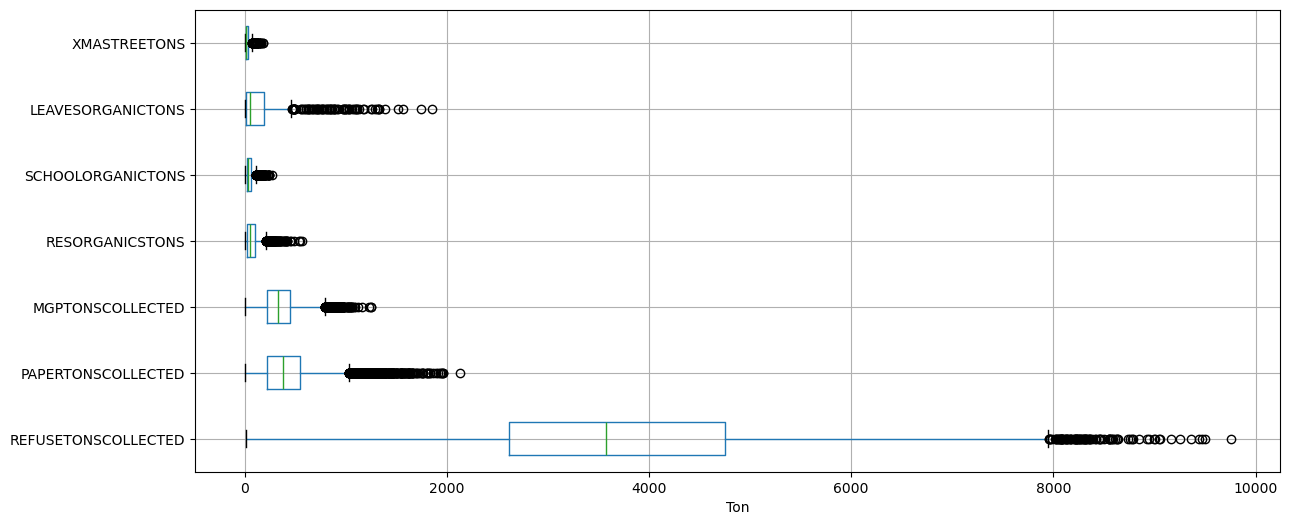

In [9]:
# plot box plot for numerical data
numIdx = ['REFUSETONSCOLLECTED', 'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS', 'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS']
fig, ax = plt.subplots(figsize=(14, 6))
df.boxplot(vert=False)
ax.set_xlabel('Ton')
plt.show()

The box plot presents the summary statistics and the presense of outliers at upper ranges visually.

In [10]:
# set index order for categorical data
monthOrd = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
boroOrd = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
idOrd = ['1.0', '2.0', '3.0', '4.0', '5.0', 'nan']
distOrd = df['COMMUNITYDISTRICT'].value_counts().index

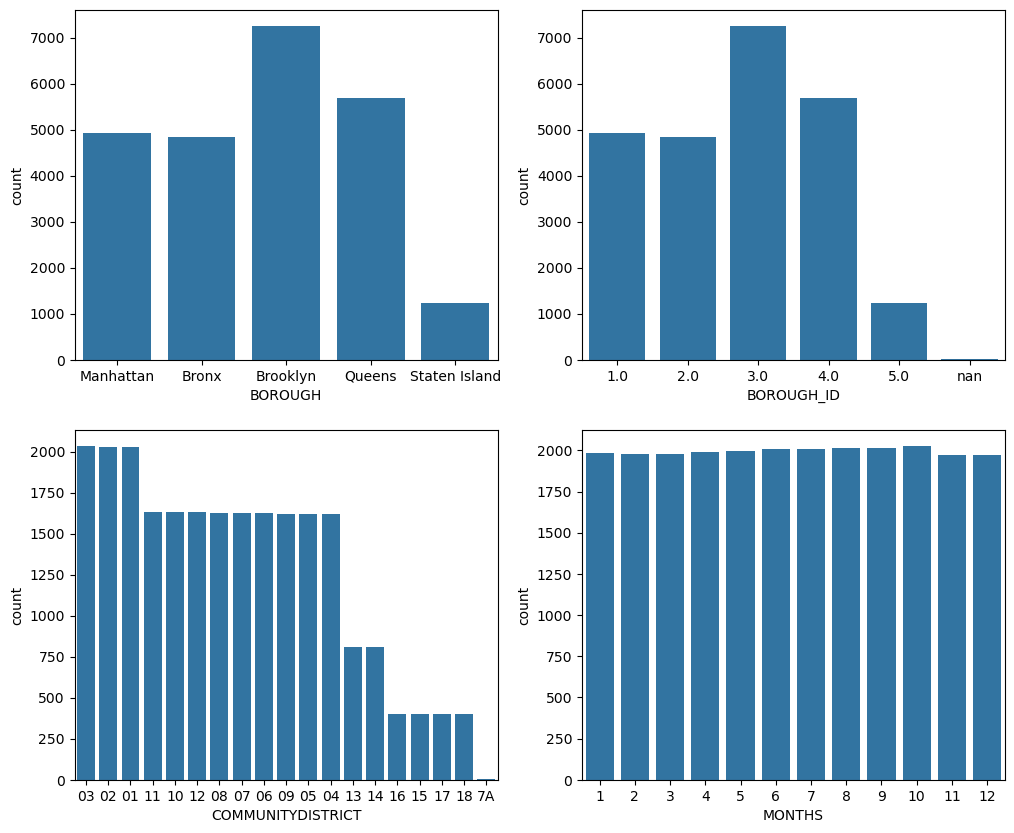

In [11]:
# plot bar charts for categorical data
nrow, ncol = 2, 2
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 10))
sns.countplot(data=df, x='BOROUGH', order=boroOrd, ax=ax[0, 0])
sns.countplot(data=df, x='BOROUGH_ID', order=idOrd, ax=ax[0, 1])
sns.countplot(data=df, x='COMMUNITYDISTRICT', order=distOrd, ax=ax[1, 0])
sns.countplot(data=df, x='MONTHS', order=monthOrd, ax=ax[1, 1])
plt.show()

The bar charts for borough and borough id are almost identical as each id corresponds to the borough. The bar chart for months show the number of data collected per month is consistent.

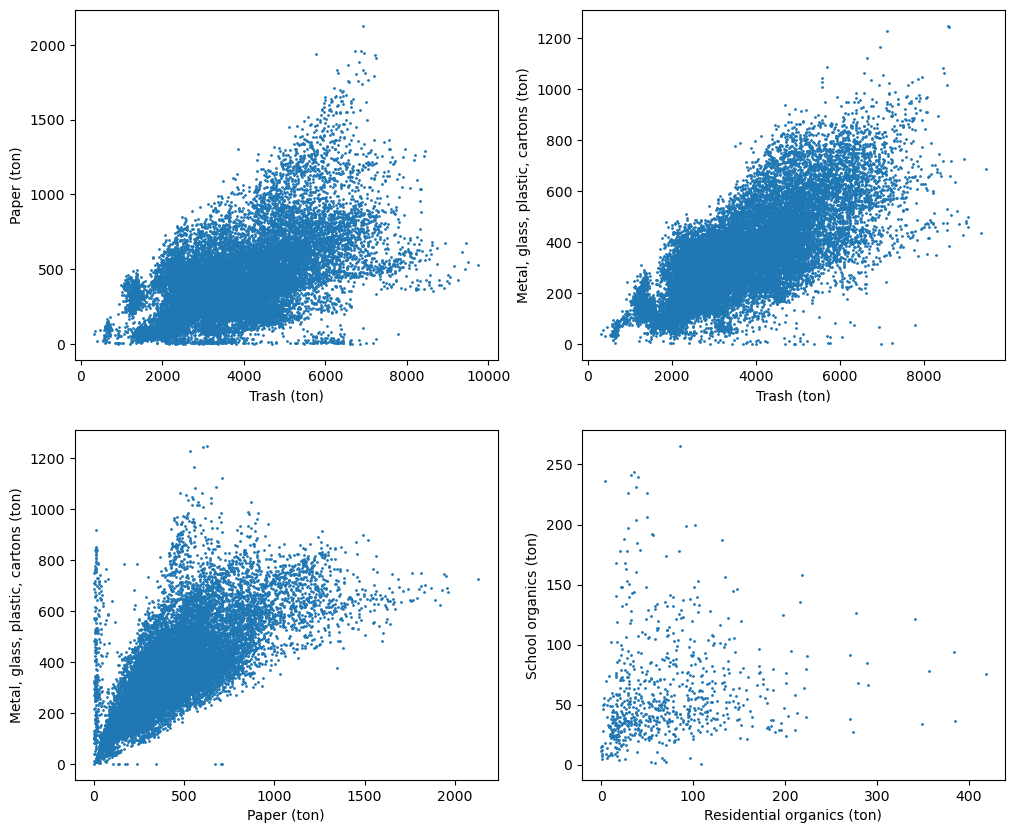

In [12]:
# plot scatter plots for numerical data pairs
nrow, ncol = 2, 2
fig, ax = plt.subplots(nrow, ncol, figsize=(12, 10))
ax[0, 0].scatter(df['REFUSETONSCOLLECTED'], df['PAPERTONSCOLLECTED'], s=1)
ax[0, 0].set_xlabel('Trash (ton)')
ax[0, 0].set_ylabel('Paper (ton)')
ax[0, 1].scatter(df['REFUSETONSCOLLECTED'], df['MGPTONSCOLLECTED'], s=1)
ax[0, 1].set_xlabel('Trash (ton)')
ax[0, 1].set_ylabel('Metal, glass, plastic, cartons (ton)')
ax[1, 0].scatter(df['PAPERTONSCOLLECTED'], df['MGPTONSCOLLECTED'], s=1)
ax[1, 0].set_xlabel('Paper (ton)')
ax[1, 0].set_ylabel('Metal, glass, plastic, cartons (ton)')
ax[1, 1].scatter(df['RESORGANICSTONS'], df['SCHOOLORGANICTONS'], s=1)
ax[1, 1].set_xlabel('Residential organics (ton)')
ax[1, 1].set_ylabel('School organics (ton)')
plt.show()

The scatter plots show there is a strong linear relationship among trash, paper, and metal, glass, plastic, and cartons collected in tons. The relationship between residential and school organics is less clear as most values are missing.

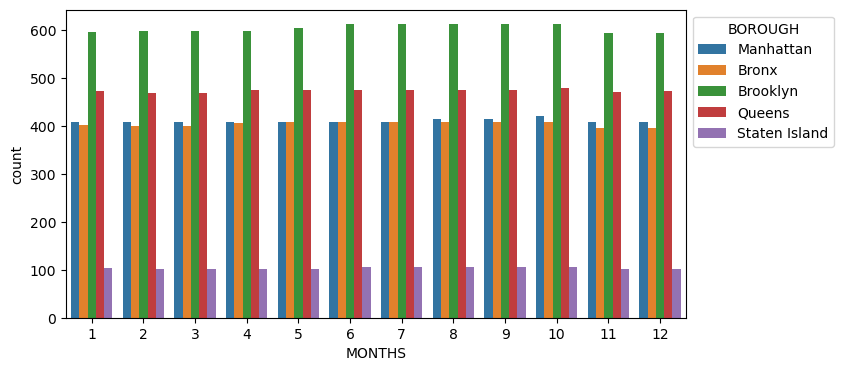

In [13]:
# plot count plot for categorical data pairs
monthOrd = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
boroOrd = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='MONTHS', hue='BOROUGH', order=monthOrd, hue_order=boroOrd)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

The bar chart shows the number of data for the 5 boroughs does not change significantly by months.

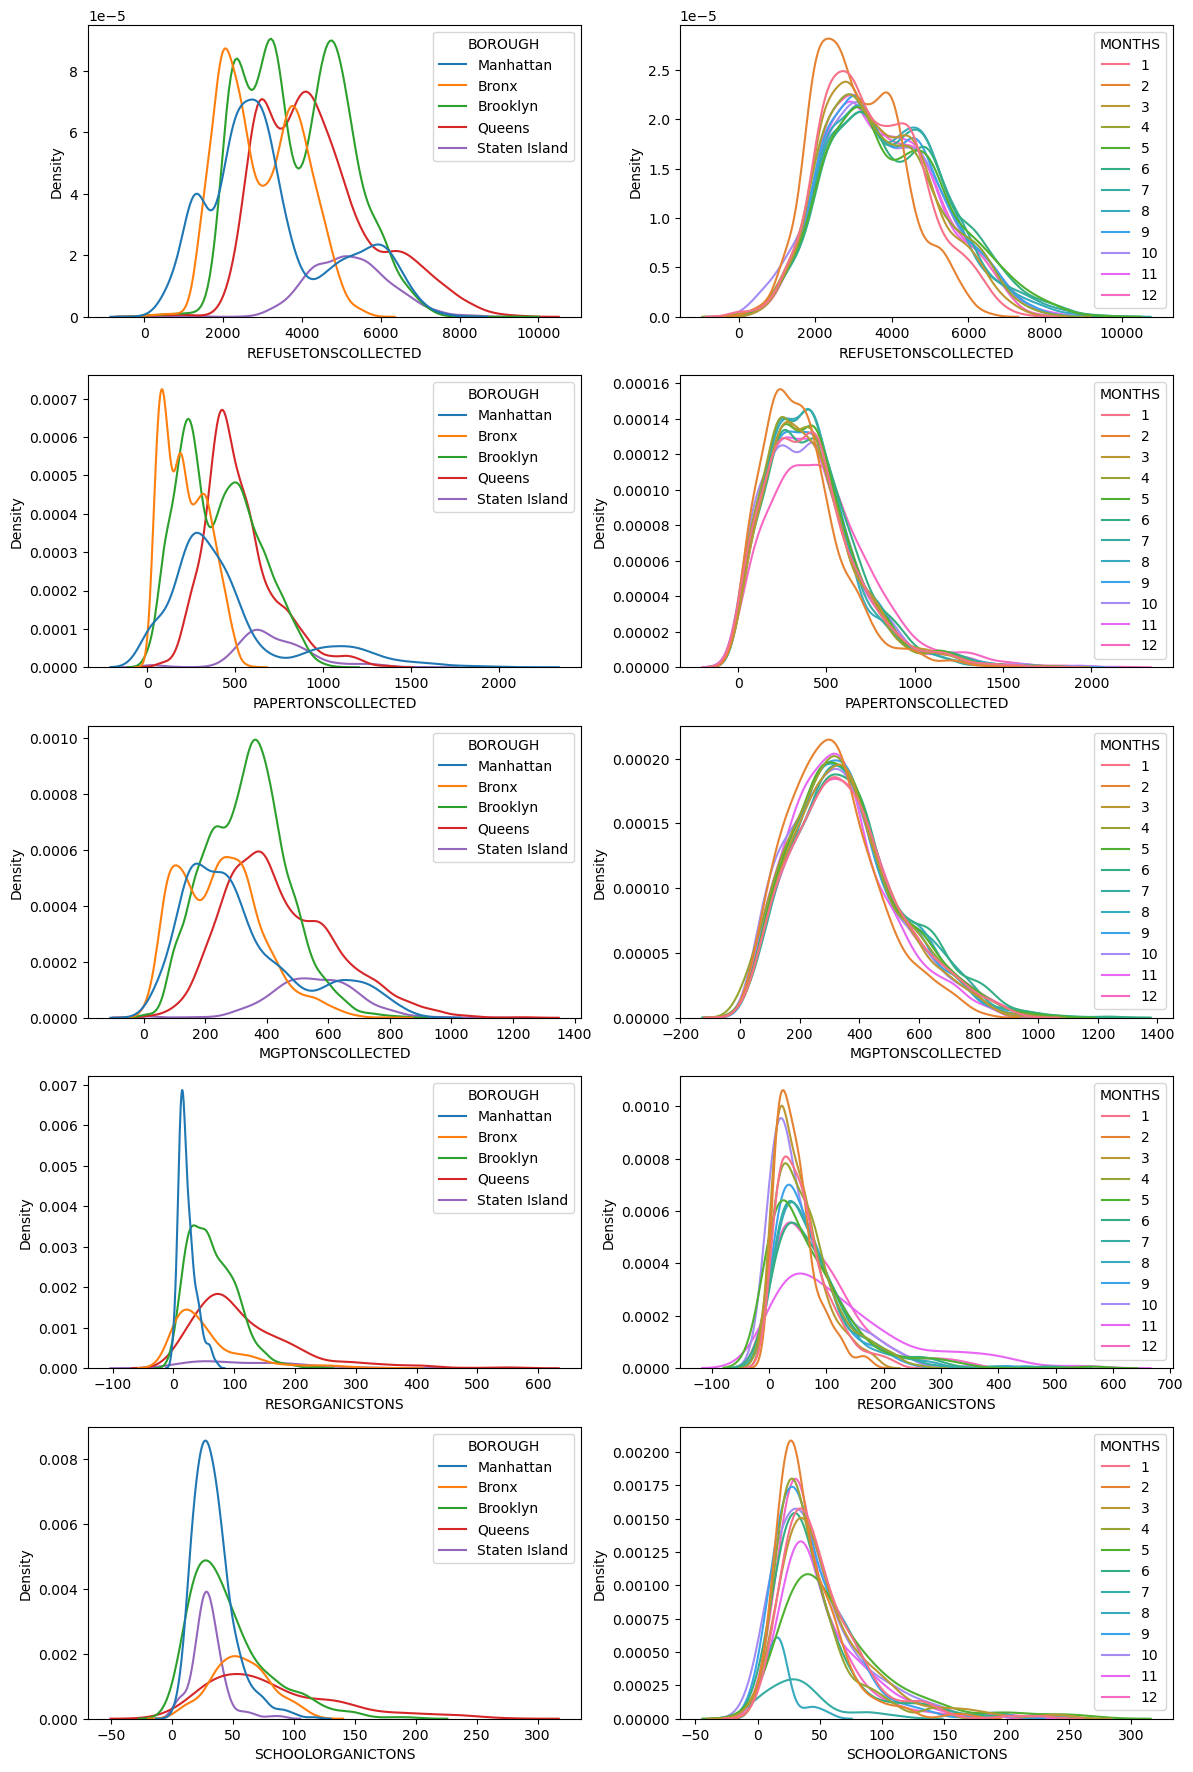

In [14]:
# plot KDE plots for numerical and categorical data
monthOrd = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
boroOrd = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
nrow, ncol = 5, 2
fig, ax = plt.subplots(nrow, ncol, figsize=(14, 22))
sns.kdeplot(data=df, x='REFUSETONSCOLLECTED', hue='BOROUGH', hue_order=boroOrd, ax=ax[0, 0])
sns.kdeplot(data=df, x='REFUSETONSCOLLECTED', hue='MONTHS', hue_order=monthOrd, ax=ax[0, 1])
sns.kdeplot(data=df, x='PAPERTONSCOLLECTED', hue='BOROUGH', hue_order=boroOrd, ax=ax[1, 0])
sns.kdeplot(data=df, x='PAPERTONSCOLLECTED', hue='MONTHS', hue_order=monthOrd, ax=ax[1, 1])
sns.kdeplot(data=df, x='MGPTONSCOLLECTED', hue='BOROUGH', hue_order=boroOrd, ax=ax[2, 0])
sns.kdeplot(data=df, x='MGPTONSCOLLECTED', hue='MONTHS', hue_order=monthOrd, ax=ax[2, 1])
sns.kdeplot(data=df, x='RESORGANICSTONS', hue='BOROUGH', hue_order=boroOrd, ax=ax[3, 0])
sns.kdeplot(data=df, x='RESORGANICSTONS', hue='MONTHS', hue_order=monthOrd, ax=ax[3, 1])
sns.kdeplot(data=df, x='SCHOOLORGANICTONS', hue='BOROUGH', hue_order=boroOrd, ax=ax[4, 0])
sns.kdeplot(data=df, x='SCHOOLORGANICTONS', hue='MONTHS', hue_order=monthOrd, ax=ax[4, 1])
plt.show()

The KDE plots on the left show that compared to other boroughs, Staten Island appears to have slightly higher average of trash, paper, and metal, glass, plastic, and cartons collected in tons. The plots on the right show that the average of school organics collected in tons seems to be lower during the summer months.